<a href="https://colab.research.google.com/github/phebesfev/Customer-Experience-Analytics-for-Fintech-Apps/blob/task1/KAIM_week_2_(Sentiment_and_Thematic_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cloning to gitub


In [1]:
!git clone https://github.com/phebesfev/Customer-Experience-Analytics-for-Fintech-Apps.git

Cloning into 'Customer-Experience-Analytics-for-Fintech-Apps'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 35 (delta 1), reused 30 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 166.50 KiB | 7.57 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
%cd Customer-Experience-Analytics-for-Fintech-Apps

/content/Customer-Experience-Analytics-for-Fintech-Apps


##Switching to new branch'task2'

In [3]:
!git checkout -b task-2

Switched to a new branch 'task-2'


#Bank of Abyssinia(BOA)

##Load the data

In [4]:
import pandas as pd

df = pd.read_csv("data/cleaned/bank.csv")


In [11]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.1 MB/s eta 0:00:00


##Import Dependencies

In [12]:
#import dependencies
import pandas as pd
import nltk
import re
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#for downloading data
import kagglehub

#sentiment analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#keyword Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Download NLTK resources

In [6]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
df.head()

,review_text,rating,date,bank_name,source
0,it's not working,3,2025-06-05,Bank of Abyssinia,Google Play
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play
2,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play
3,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play


##preprocessing

In [15]:
# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['processed_review'] = df['review_text'].apply(preprocess_text)

In [16]:
df.head()

,review_text,rating,date,bank_name,source,processed_review
0,it's not working,3,2025-06-05,Bank of Abyssinia,Google Play,working
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play,hello facing problem boa mobile app every time...
2,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play,exceptional
3,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play,boa mobile good bank
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play,worest app loading


##Sentiment Analysis with VADER

In [17]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
df['vader_sentiment'] = df['review_text'].apply(get_vader_sentiment)

# Display sentiment distribution
print(df['vader_sentiment'].value_counts())

vader_sentiment
positive    215
neutral     167
negative    117
Name: count, dtype: int64


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [18]:
df.head()

,review_text,rating,date,bank_name,source,processed_review,vader_sentiment
0,it's not working,3,2025-06-05,Bank of Abyssinia,Google Play,working,neutral
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play,hello facing problem boa mobile app every time...,negative
2,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play,exceptional,neutral
3,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play,boa mobile good bank,positive
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play,worest app loading,neutral


##Advanced Sentiment Analysis with Machine Learning

In [20]:
# Create labels based on ratings
df['label'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_review'])
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8


In [21]:
df.head()

,review_text,rating,date,bank_name,source,processed_review,vader_sentiment,label
0,it's not working,3,2025-06-05,Bank of Abyssinia,Google Play,working,neutral,neutral
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play,hello facing problem boa mobile app every time...,negative,negative
2,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play,exceptional,neutral,positive
3,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play,boa mobile good bank,positive,positive
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play,worest app loading,neutral,negative


##Key word Extraction with TF-IDF

In [22]:
# Vectorize the dataset
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['processed_review'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)

Top Keywords: ['abyssinia' 'account' 'also' 'always' 'amazing' 'android' 'app'
 'application' 'apps' 'bad' 'bank' 'banking' 'best' 'better' 'boa' 'bug'
 'ca' 'cbe' 'could' 'country' 'crash' 'customer' 'day' 'developer' 'dont'
 'download' 'easy' 'error' 'ethiopia' 'even' 'ever' 'every' 'excellent'
 'experience' 'fast' 'fix' 'frustrating' 'get' 'good' 'great' 'improve'
 'improvement' 'issue' 'keep' 'kind' 'know' 'like' 'long' 'love' 'make'
 'many' 'mobile' 'mode' 'money' 'much' 'need' 'never' 'new' 'nice' 'ok'
 'one' 'open' 'option' 'phone' 'please' 'point' 'poor' 'problem' 'really'
 'say' 'screenshot' 'seen' 'service' 'slow' 'sometimes' 'still' 'system'
 'take' 'thank' 'thing' 'time' 'transaction' 'transfer' 'try' 'turn'
 'update' 'use' 'used' 'useless' 'user' 'using' 'version' 'worest' 'work'
 'working' 'worst' 'would' 'wow' 'በጣም' 'ነው']


##Clustering Bank App Reviews into Themes

###Vectorize the preprocessed reviews using TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['processed_review'])


In [25]:
from sklearn.cluster import KMeans

num_clusters = 4  # Change to 3–5 depending on granularity
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

df['cluster'] = kmeans.labels_


In [26]:
df.head()

,review_text,rating,date,bank_name,source,processed_review,vader_sentiment,label,cluster
0,it's not working,3,2025-06-05,Bank of Abyssinia,Google Play,working,neutral,neutral,3
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play,hello facing problem boa mobile app every time...,negative,negative,0
2,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play,exceptional,neutral,positive,0
3,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play,boa mobile good bank,positive,positive,0
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play,worest app loading,neutral,negative,0


In [27]:
import numpy as np

def get_top_keywords(n_terms):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = tfidf.get_feature_names_out()

    for i in range(num_clusters):
        print(f"\n📌 Cluster {i} top keywords:")
        for ind in order_centroids[i, :n_terms]:
            print(terms[ind], end=", ")
        print("\n")

get_top_keywords(10)



📌 Cluster 0 top keywords:
app, work, best, boa, bank, nice, banking, worst, mobile, use, 


📌 Cluster 1 top keywords:
ok, ነው, wow, በጣም, worst mobile, worst app, worst, working, work, worest app, 


📌 Cluster 2 top keywords:
good, application, really, get, always, slow, service, time, worst mobile, worst app, 


📌 Cluster 3 top keywords:
working, app working, app, day, please, need, even, best, screenshot, useless app, 



In [28]:
cluster_labels = {
    0: "General Feedback",
    1: "Negative Reviews (Amharic Users)",
    2: "Performance & Service Issues",
    3: "Bugs & Feature Requests"
}

df['theme'] = df['cluster'].map(cluster_labels)


In [29]:
df.head()

,review_text,rating,date,bank_name,source,processed_review,vader_sentiment,label,cluster,theme
0,it's not working,3,2025-06-05,Bank of Abyssinia,Google Play,working,neutral,neutral,3,Bugs & Feature Requests
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03,Bank of Abyssinia,Google Play,hello facing problem boa mobile app every time...,negative,negative,0,General Feedback
2,exceptional,5,2025-06-03,Bank of Abyssinia,Google Play,exceptional,neutral,positive,0,General Feedback
3,BoA Mobile good bank,5,2025-06-02,Bank of Abyssinia,Google Play,boa mobile good bank,positive,positive,0,General Feedback
4,this is worest app 24/7 loading,1,2025-06-01,Bank of Abyssinia,Google Play,worest app loading,neutral,negative,0,General Feedback


##Summary Table

In [35]:
summary = df.groupby('theme')['review_text'].count().reset_index(name='review_count')
print(summary)


                              theme  review_count
0           Bugs & Feature Requests            17
1                  General Feedback           423
2  Negative Reviews (Amharic Users)            12
3      Performance & Service Issues            47


##combination of sentiment and keyword extraction

In [31]:
# Filter positive and negative reviews
positive_reviews = df[df['vader_sentiment'] == 'positive']['processed_review']
negative_reviews = df[df['vader_sentiment'] == 'negative']['processed_review']

# Extract keywords from positive reviews
vectorizer_pos = TfidfVectorizer(max_features=10)
X_pos = vectorizer_pos.fit_transform(positive_reviews)
print("Top Keywords in Positive Reviews:", vectorizer_pos.get_feature_names_out())

# Extract keywords from negative reviews
vectorizer_neg = TfidfVectorizer(max_features=10)
X_neg = vectorizer_neg.fit_transform(negative_reviews)
print("Top Keywords in Negative Reviews:", vectorizer_neg.get_feature_names_out())

Top Keywords in Positive Reviews: ['app' 'bank' 'banking' 'best' 'boa' 'good' 'like' 'nice' 'please' 'use']
Top Keywords in Negative Reviews: ['app' 'bank' 'banking' 'developer' 'even' 'ever' 'mobile' 'time' 'work'
 'worst']


##Visualizing the result

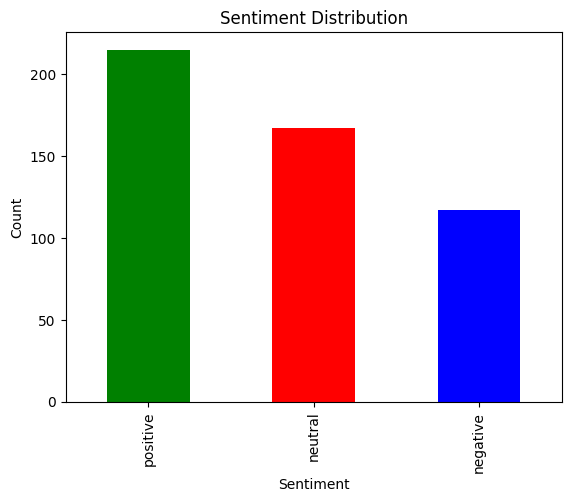

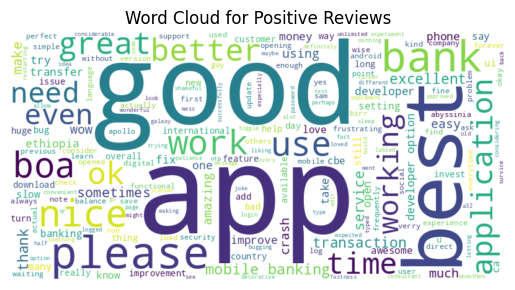

In [33]:
# Sentiment distribution
df['vader_sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

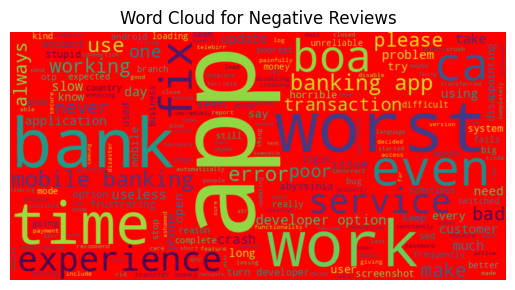

In [34]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

#CBE and Dashen

##Load data

In [38]:
df1 = pd.read_csv("data/cleaned/commercial.csv")
df2 = pd.read_csv("data/cleaned/dashen.csv")



## Apply preprocessing


In [39]:
df1['processed_review'] = df1['review_text'].apply(preprocess_text)
df2['processed_review'] = df2['review_text'].apply(preprocess_text)

In [40]:
df1.head()

,review_text,rating,date,bank_name,source,processed_review
0,A great app. It's like carrying a bank in your...,4,2025-06-07,Commercial Bank of Ethiopia,Google Play,great app like carrying bank pocket
1,More than garrantty bank EBC.,4,2025-06-07,Commercial Bank of Ethiopia,Google Play,garrantty bank ebc
2,really am happy to this app it is Siple to use...,5,2025-06-07,Commercial Bank of Ethiopia,Google Play,really happy app siple use everything
3,I liked this app. But the User interface is ve...,2,2025-06-07,Commercial Bank of Ethiopia,Google Play,liked app user interface basic attractive
4,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,Commercial Bank of Ethiopia,Google Play,atm support transfer like country kenya nigeri...


In [41]:
df2.head()

,review_text,rating,date,bank_name,source,processed_review
0,I like this mobile banking app very much. Over...,2,2025-06-07,Dashen Bank,Google Play,like mobile banking app much overall user inte...
1,love,3,2025-06-06,Dashen Bank,Google Play,love
2,መቸሸጠ,5,2025-06-03,Dashen Bank,Google Play,መቸሸጠ
3,wow,5,2025-06-03,Dashen Bank,Google Play,wow
4,gadaa,5,2025-06-01,Dashen Bank,Google Play,gadaa


##Apply VADER sentiment analysis

In [42]:
# Apply VADER sentiment analysis
df1['vader_sentiment'] = df1['review_text'].apply(get_vader_sentiment)

# Display sentiment distribution
print(df1['vader_sentiment'].value_counts())

vader_sentiment
positive    320
neutral     125
negative     35
Name: count, dtype: int64


In [43]:
# Apply VADER sentiment analysis
df2['vader_sentiment'] = df2['review_text'].apply(get_vader_sentiment)

# Display sentiment distribution
print(df2['vader_sentiment'].value_counts())

vader_sentiment
positive    330
neutral      94
negative     24
Name: count, dtype: int64


##Advanced Sentiment Analysis with Machine Learning

In [44]:
#CBE
# Create labels based on ratings
df1['label'] = df1['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1['processed_review'])
y = df1['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7083333333333334


In [45]:
#Dashen
# Create labels based on ratings
df2['label'] = df2['rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df2['processed_review'])
y = df2['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7777777777777778


##Key word Extraction with TF-IDF

In [46]:
# Vectorize the dataset
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df1['processed_review'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)

Top Keywords: ['2025' 'access' 'account' 'add' 'allow' 'amazing' 'app' 'application'
 'apps' 'back' 'bad' 'bank' 'banking' 'best' 'better' 'bug' 'ca' 'cbe'
 'connection' 'convenient' 'could' 'crash' 'day' 'developer' 'doesnt'
 'download' 'easy' 'even' 'ever' 'every' 'everything' 'excellent'
 'experience' 'fantastic' 'fast' 'feature' 'fix' 'good' 'great' 'happy'
 'issue' 'keep' 'life' 'like' 'love' 'make' 'many' 'mobile' 'money' 'much'
 'need' 'network' 'nice' 'ok' 'old' 'one' 'option' 'please' 'problem'
 'really' 'reason' 'reliable' 'say' 'screen' 'screenshot' 'screenshots'
 'security' 'seen' 'send' 'service' 'shot' 'simple' 'sometimes' 'system'
 'take' 'thank' 'thankyou' 'thing' 'time' 'transaction' 'transfer' 'try'
 'update' 'use' 'used' 'useful' 'user' 'using' 'week' 'well' 'without'
 'work' 'working' 'wow' 'ምርጥ' 'በጣም' 'ነው' 'ወይም' 'ግን' 'ጥሩ']


In [47]:
# Vectorize the dataset
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df2['processed_review'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)

Top Keywords: ['able' 'account' 'ahead' 'also' 'always' 'amazing' 'amole' 'app'
 'application' 'balance' 'bank' 'banking' 'best' 'better' 'bill' 'budget'
 'changer' 'chat' 'convenience' 'convenient' 'customer' 'dashen' 'design'
 'digital' 'easier' 'easily' 'easy' 'ethiopia' 'ethiopian' 'ever'
 'everything' 'excellent' 'experience' 'fast' 'feature' 'financial'
 'friendly' 'game' 'good' 'great' 'highly' 'incredibly' 'innovation'
 'interface' 'intuitive' 'keep' 'life' 'like' 'local' 'lot' 'love' 'make'
 'making' 'many' 'mobile' 'money' 'need' 'new' 'nice' 'one' 'option' 'pay'
 'payment' 'place' 'platform' 'product' 'really' 'recommended' 'reliable'
 'seamless' 'secure' 'security' 'service' 'shopping' 'simple' 'slow'
 'smooth' 'solution' 'speed' 'step' 'super' 'superapp' 'supper' 'telebirr'
 'thanks' 'time' 'transaction' 'transfer' 'truly' 'update' 'use' 'used'
 'user' 'using' 'version' 'well' 'work' 'working' 'wow' 'ነው']


##Clustering Bank App Reviews into Themes

In [52]:
def cluster_and_get_keywords(df, num_clusters=4, n_terms=10):
    # TF-IDF Vectorization
    tfidf = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
    X_tfidf = tfidf.fit_transform(df['processed_review'])

    # KMeans Clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)

    # Assign cluster labels
    df['cluster'] = kmeans.labels_

    # Extract top keywords per cluster
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = tfidf.get_feature_names_out()

    print("====== Top Keywords by Cluster ======")
    for i in range(num_clusters):
        print(f"\n📌 Cluster {i} top keywords:")
        for ind in order_centroids[i, :n_terms]:
            print(terms[ind], end=", ")
        print("\n")

    return df  # Return df with cluster labels

# Example usage:
df1_clustered = cluster_and_get_keywords(df1)
df2_clustered = cluster_and_get_keywords(df2)


====== Top Keywords by Cluster ======

📌 Cluster 0 top keywords:
app, cbe, like, great, bank, excellent, easy, ok, good, use, 


📌 Cluster 1 top keywords:
best, app, banking, mobile, loved, finance, apps, bank, wow, application, 


📌 Cluster 2 top keywords:
good, app, application, fast, time, work, እና, አፕ, ነገር, ነው, 


📌 Cluster 3 top keywords:
nice, app, service, convenient, bank, fast, እና, አፕ, ነገር, ምርጥ, 

====== Top Keywords by Cluster ======

📌 Cluster 0 top keywords:
best, app, wow, amazing, banking, application, fast, feature, excellent, use, 


📌 Cluster 1 top keywords:
good, app, easy, latest, option, need, mobile, use, bank, far, 


📌 Cluster 2 top keywords:
nice, app, application, wish, functionality, future, game, generate, given, glitch, 


📌 Cluster 3 top keywords:
dashen, bank, super, app, use, easy, fast, step, banking, secure, 

